<a href="https://colab.research.google.com/github/smiley52/hand-wrriten-digits-recog/blob/main/handwrriten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train , y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(10000, 28, 28)
5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 

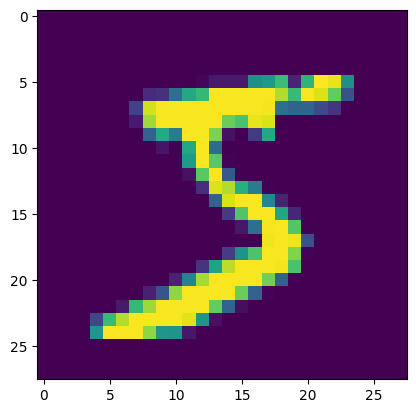

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(x_train.shape)
print(x_test.shape)
print(y_train[0])
print(x_train[0])

In [5]:
x_train , x_test = x_train / 255.0 , x_test / 255.0

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512 , activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [11]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self , epoch , logs={}):
    if(logs.get('accuracy') >= 0.99):
      print("\nreached end")
      self.model.stop_training = True

callbacks = mycallback()

In [12]:
model.compile(optimizer = 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(x_train,y_train , epochs =100 ,callbacks = [callbacks])

Epoch 1/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2011 - accuracy: 0.9407
Epoch 2/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0792 - accuracy: 0.9760
Epoch 3/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0518 - accuracy: 0.9833
Epoch 4/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0359 - accuracy: 0.9884
Epoch 5/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.0258 - accuracy: 0.9917
reached end
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0259 - accuracy: 0.9917


In [14]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0592 - accuracy: 0.9823


[0.059188634157180786, 0.9822999835014343]

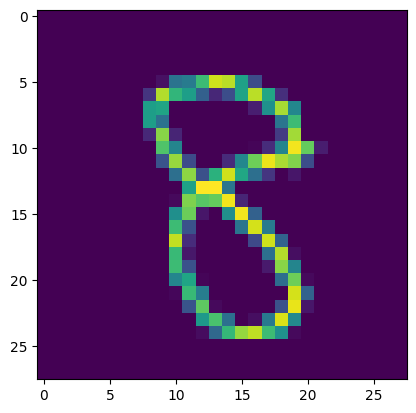

In [19]:
plt.imshow(x_train[3600])

In [28]:
y_train[3600]

8

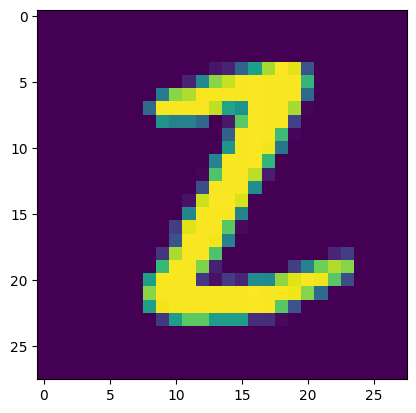

In [30]:
plt.imshow(x_test[3600])

In [31]:
y_test[3600]

2

In [39]:
print(model.predict(x_test[[3600]]))


1/1 [==============================] - 0s 31ms/step
[[1.4479467e-09 6.7505047e-05 9.9981457e-01 7.6249280e-06 1.3931910e-17 1.1840595e-11 1.2186946e-11 1.3000341e-06 1.0908574e-04 5.3161094e-11]]


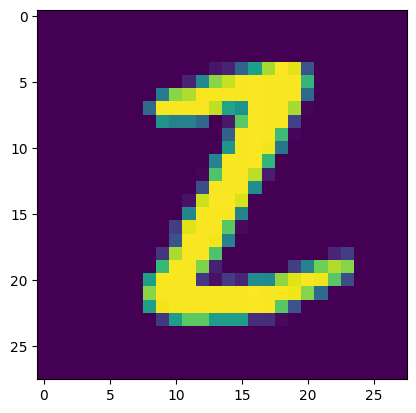

In [40]:
plt.imshow(x_test[3600])

In [41]:
y_test[3600]

2

In [51]:
np.set_printoptions(linewidth=200)
print(x_test[21])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.    

In [52]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [53]:
print(y_pred[3600])

[1.4479439e-09 6.7504981e-05 9.9981451e-01 7.6249275e-06 1.3931963e-17 1.1840617e-11 1.2186945e-11 1.3000340e-06 1.0908564e-04 5.3161090e-11]


In [54]:
print(np.argmax(y_pred[3600]))

2
